# Kp - Ap - индексы геомагнитной активности

In [72]:
import pandas as pd
import numpy
import math

In [73]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['fmax', 'fmin', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [74]:
kp_index = pd.read_table('kp.txt', parse_dates=True,skiprows=1,sep=r'\s+')

In [75]:
# значение Kp - в баллах (символьная переменная) - трехчасовой индекс, Ap - в наноТеслах (число)
kp_index.head()

,20121201,1,1.1,0+,0+.1,1-,1-.1,2+,2+.1,9-,4,4.1,2,2.1,3,3.1,9,9.1,4.2
0,20121202,3-,3-,3-,3-,2,1-,0+,0,14-,12,12,12,12,7,3,2,0,8
1,20121203,0+,1,1+,1-,1,1,1-,1+,7+,2,4,5,3,4,4,3,5,4
2,20121204,1+,3-,2,0+,0+,0,0+,0,7,5,12,7,2,2,0,2,0,4
3,20121205,0,0,0,0+,0,0,1-,1+,2+,0,0,0,2,0,0,3,5,1
4,20121206,0,0,0,0+,0+,0,0,0,1-,0,0,0,2,2,0,0,0,0


In [76]:
# переименуем столбцы
kp=kp_index.rename(columns={'20121201':'Date','1':'Kp_1','1.1':'Kp_2','0+':'Kp_3','0+.1':'Kp_4','1-':'Kp_5','1-.1':'Kp_6','2+':'Kp_7','2+.1':'Kp_8','9-':'SumKp','4':'ap_1','4.1':'ap_2','2':'ap_3','2.1':'ap_4','3':'ap_5','3.1':'ap_6','9':'ap_7','9.1':'ap_8','4.2':'Av_ap'})

In [77]:
kp.head()

,Date,Kp_1,Kp_2,Kp_3,Kp_4,Kp_5,Kp_6,Kp_7,Kp_8,SumKp,ap_1,ap_2,ap_3,ap_4,ap_5,ap_6,ap_7,ap_8,Av_ap
0,20121202,3-,3-,3-,3-,2,1-,0+,0,14-,12,12,12,12,7,3,2,0,8
1,20121203,0+,1,1+,1-,1,1,1-,1+,7+,2,4,5,3,4,4,3,5,4
2,20121204,1+,3-,2,0+,0+,0,0+,0,7,5,12,7,2,2,0,2,0,4
3,20121205,0,0,0,0+,0,0,1-,1+,2+,0,0,0,2,0,0,3,5,1
4,20121206,0,0,0,0+,0+,0,0,0,1-,0,0,0,2,2,0,0,0,0


In [91]:
print(kp.Date[0],kp.Date[len(kp.Date)-1],len(kp.Date))

20121202 20130228 89


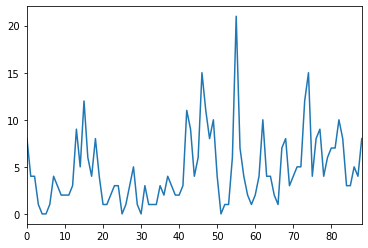

In [79]:
# строим среднесуточное значенеие
kp['Av_ap'].plot()

### Собственно само Фурье

In [80]:
# создаем massiv Ap-daily размерности N
N=kp.shape[0] # длина измерений
# для к-тов надо в 2 раза меньше длина
Np=int(N/2)

# Ap-massive

Ap=asarray(kp['Av_ap'],dtype = float)
print(type(Ap))

<class 'numpy.ndarray'>


In [81]:
# интервал в сутках
dt=1.
t=arange(N)

# Fust Furie transform

In [82]:
Y = fft.fft(Ap-mean(Ap)) # fft computing and normalization

w=fftfreq(N, d=1.0)
# Функция, которая расчитывает значения частот от минимальной до максимально возможной
# задаем количество частот и шаг по частоте=частоте Котельникова
# возвращает частоты для выходных массивов функций fft*.
# "нулевая" частота соответствует среднему значению y
# отрицательные частоты имеют смысл для комплексного сигнала
# всего используем N/2 положительных частот
frq=ones(Np)
frq[0:Np-1]=w[1:Np]

<Figure size 432x432 with 0 Axes>

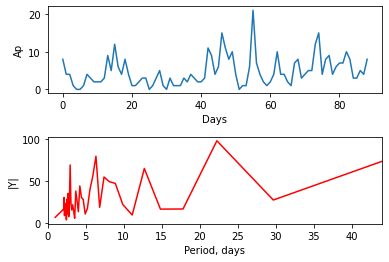

In [83]:
figure(1, figsize=(6,6))
fig,ax = plt.subplots(2, 1)
ax[0].plot(t,Ap)
ax[0].set_xlabel('Days')
ax[0].set_ylabel('Ap')
fig.subplots_adjust(hspace=0.5)
ax[1].plot(1./frq[1:Np],abs(Y[1:Np]),'r') # plotting the spectrum
ax[1].set_xlim([0,Np])
ax[1].set_xlabel('Period, days')
ax[1].set_ylabel('|Y|')
savefig('same_size.png', dpi=600)
show()

Обратите на внимание на рост низкочастотных (с большим периодом) колебаний. Это следствие небольшого роста Ар после 50-го дня

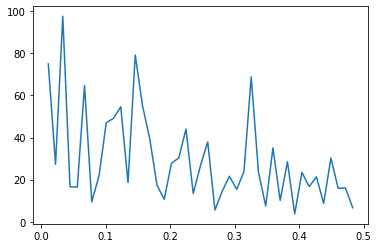

In [84]:
# график в частотном диапазоне
plot(w[1:Np],abs(Y[1:Np]))

### Lomb-Scragle method

In [85]:
import scipy.signal as signal

In [86]:
# частоты расчитываются по правилу 1.*d/N, 2*d/N ... (N/2-1)*d/N
Np=int(N/2)
#f= arange(1.,N/2.)/N
# периоды
per=ones(Np)
per[0:Np-1]=1./frq[1:Np]
print(per)

[44.5        29.66666667 22.25       17.8        14.83333333 12.71428571
 11.125       9.88888889  8.9         8.09090909  7.41666667  6.84615385
  6.35714286  5.93333333  5.5625      5.23529412  4.94444444  4.68421053
  4.45        4.23809524  4.04545455  3.86956522  3.70833333  3.56
  3.42307692  3.2962963   3.17857143  3.06896552  2.96666667  2.87096774
  2.78125     2.6969697   2.61764706  2.54285714  2.47222222  2.40540541
  2.34210526  2.28205128  2.225       2.17073171  2.11904762  2.06976744
  1.          1.        ]


In [93]:
# частоты с равномерным шагом
fmin=1./Np
fmax=1.
f=linspace(fmin,fmax,50)

In [94]:
#Calculate Lomb-Scargle periodogram:
pgram = signal.lombscargle(t, Ap, f, normalize=True)
#pgram = signal.lombscargle(t, Ap, f)

Text(0.5, 0, 'frequency,1/day')

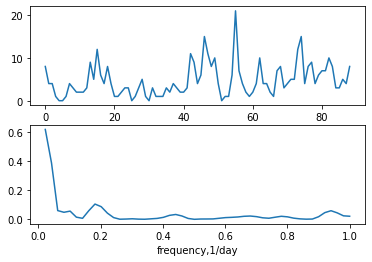

In [95]:
subplot(2, 1,1)
plot(t,Ap)

subplot(2, 1, 2)
plot(f[:],pgram[:])
xlabel('frequency,1/day')

8.0 89 50 6.283185307179586


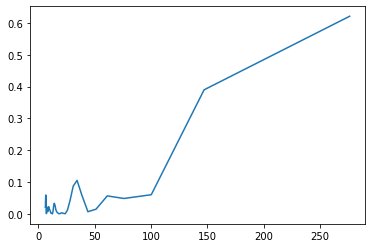

In [98]:
period=[]

period[:]=2.*pi/f[:]
print(Ap[len(Ap)-1],len(Ap),len(period),period[len(period)-1])
plot(period[:],pgram[:])


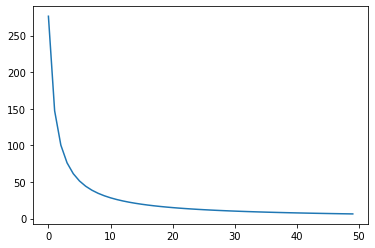

In [99]:
plot(period)